In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import discrete_pendulum
from env_wrapper import EnvWrapper
from utils import *

algorithms=['sarsa', 'q_learning']

def test_x_to_s(env):
    theta = np.linspace(-np.pi * (1 - (1 / env.n_theta)), np.pi * (1 - (1 / env.n_theta)), env.n_theta)
    thetadot = np.linspace(-env.max_thetadot * (1 - (1 / env.n_thetadot)), env.max_thetadot * (1 - (1 / env.n_thetadot)), env.n_thetadot)
    for s in range(env.num_states):
        i = s // env.n_thetadot
        j = s % env.n_thetadot
        s1 = env._x_to_s([theta[i], thetadot[j]])
        if s1 != s:
            raise Exception(f'test_x_to_s: error in state representation: {s} and {s1} should be the same')
    print('test_x_to_s: passed')

env = discrete_pendulum.Pendulum(n_theta=31, n_thetadot=31)

# Apply unit test to check state representation
test_x_to_s(env)

# Initialize simulation
s = env.reset()

# Create log to store data from simulation
log = {
    't': [0],
    's': [s],
    'a': [],
    'r': [],
    'theta': [env.x[0]],        # agent does not have access to this, but helpful for display
    'thetadot': [env.x[1]],     # agent does not have access to this, but helpful for display
}

learn = get_learn_function(algorithms[0])
model = learn(env, scene='pendulum', epsilon=0.2, alpha=0.4, max_it=10000)

test_x_to_s: passed
[[0.87540998 0.69375691 0.17133545 ... 0.06331116 0.81734101 0.39068312]
 [0.05915475 0.47101096 0.76183054 ... 0.33148755 0.92543089 0.96271085]
 [0.6299517  0.27699522 0.28893174 ... 0.51707555 0.9027054  0.83740294]
 ...
 [0.65565473 0.32770511 0.91045402 ... 0.04797867 0.22103981 0.62495242]
 [0.73696408 0.19240646 0.58391282 ... 0.10069789 0.29324012 0.18145494]
 [0.09044551 0.30056289 0.8223768  ... 0.93005446 0.07912348 0.38199799]]
[18  8 20 20 13 30 23 19 24 18  6  1  0 15  5  6 30 28 27 22 29 17  3  1
 10 25  6 16 18  1  1  8 28 15 17 28 30  8 22 26 16  4  3  8  2  1  5 24
  9 22 28 30 28 18 14 13 23  4  1 25 16 26 27 18 17 13  3  0 14 20 13 17
  1  6  5  0  4 14 23 15 30 23 27 15 14  6  2  9  6 18 18 14 22 11  6  0
 18  0 30 10 23 23  3  6  2  3  2 27 30 14 26 23 30 29  6 24 29  2 12 14
 25 10 12 11 29  4  9  1 29 26 14 29 27 17  0  0  6  1  1  5 25 10 26 17
 28 25  2 23 15 23 23 22 20  2  5 24  2  9  9  4 11 10 25 28 17  5  0  2
  8  2 12  4  7  8 30 24 

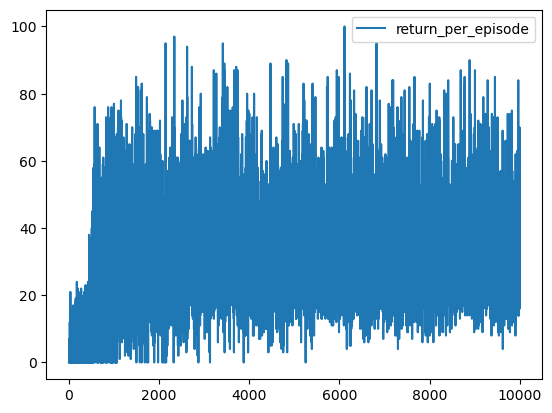

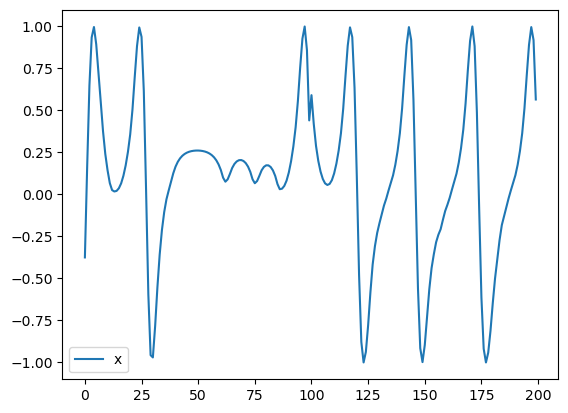

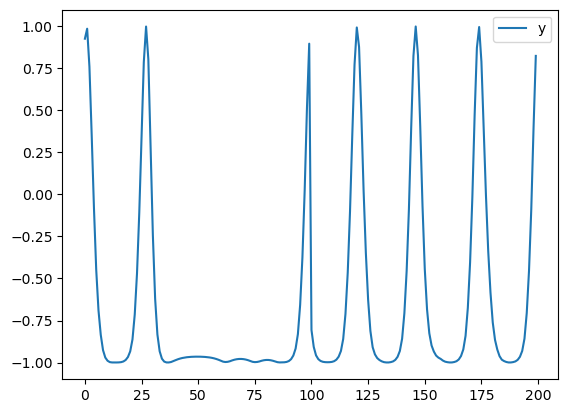

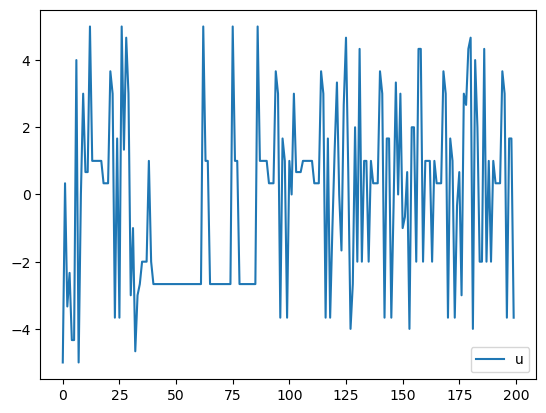

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
114


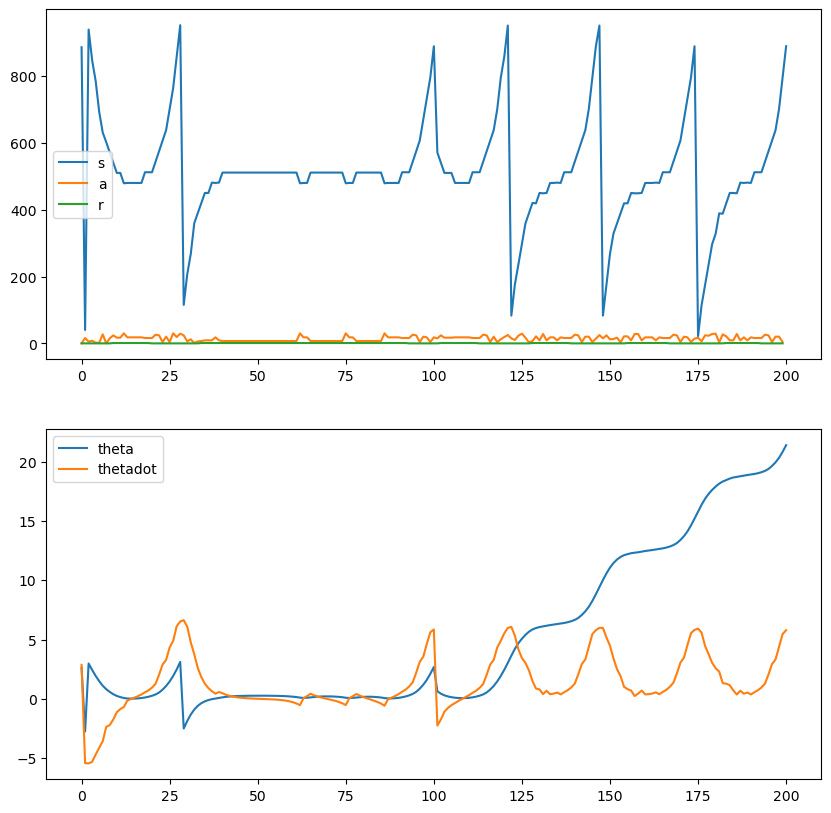

In [3]:
# Simulate until episode is done
s = env.reset()
done = False
while not done:
    a = model.get_policy(s)
    # a = random.randrange(env.num_actions)
    (s, r, done, u) = env.step(a)
    log['t'].append(log['t'][-1] + 1)
    log['s'].append(s)
    log['a'].append(a)
    log['r'].append(r)
    theta=env.x[0]
    thetadot=env.x[1]
    log['theta'].append(theta)
    log['thetadot'].append(thetadot)

    # Plot x and y coordinates from theta
    x = env.params['l'] * np.sin(theta)
    y = -env.params['l'] * np.cos(theta)
    model.log.add('x', x)
    model.log.add('y', y)
    model.log.add('u', u)

model.log.plot(save=True)
print(log['r'])
print(sum(log['r']))

# Plot data and save to png file
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].plot(log['t'], log['s'])
ax[0].plot(log['t'][:-1], log['a'])
ax[0].plot(log['t'][:-1], log['r'])
ax[0].legend(['s', 'a', 'r'])
ax[1].plot(log['t'], log['theta'])
ax[1].plot(log['t'], log['thetadot'])
ax[1].legend(['theta', 'thetadot'])
plt.savefig('figures/pendulum/test_discrete_pendulum.png')
plt.show()